In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import knee_locator

In [12]:
df = pd.read_csv("mall customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df = df.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})
df['Gender'] = df['Gender'].replace(['Male', 'Female'],[1,0])
df.head()

C:\Users\MD Maruf\AppData\Local\Temp\ipykernel_19432\2086650241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(['Male', 'Female'],[1,0])


,CustomerID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


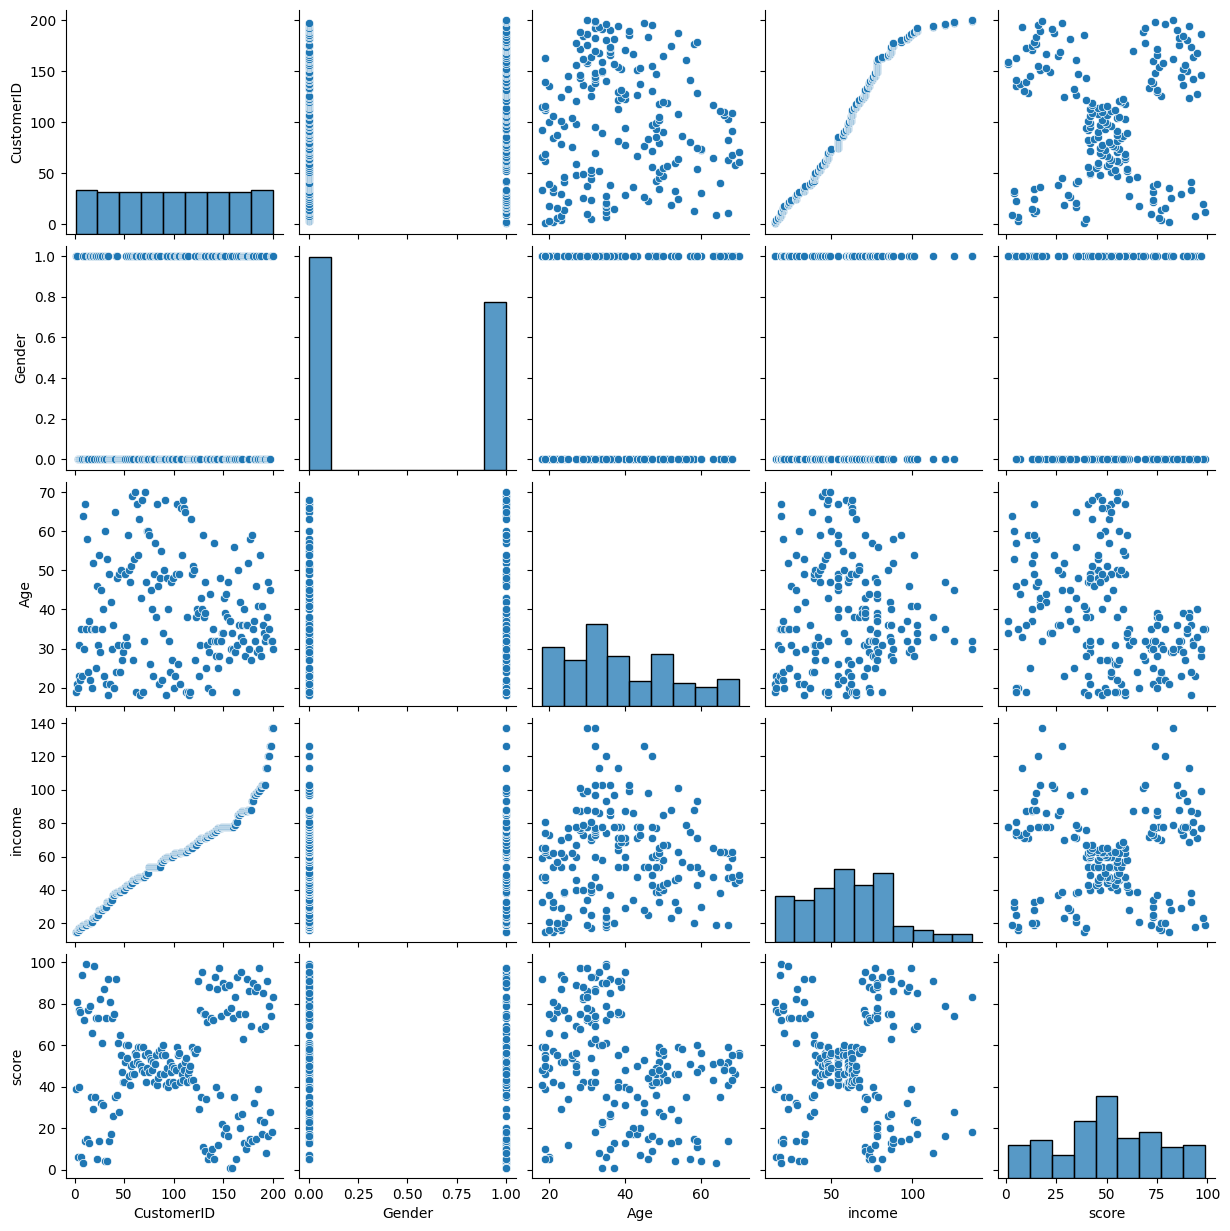

In [17]:
sns.pairplot(df)


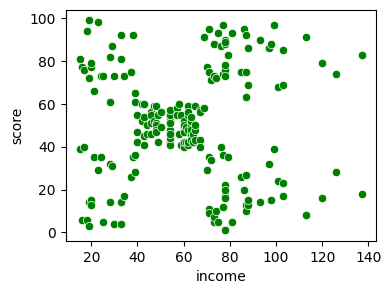

In [20]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='income', y='score', data=df, color='green')
plt.show()

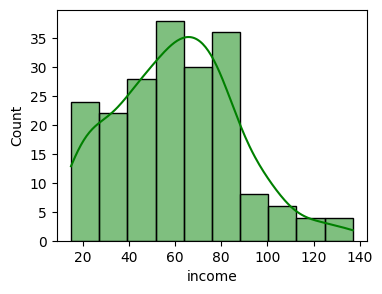

In [23]:
plt.figure(figsize=(4,3))
sns.histplot(x='income', data=df, color='green', kde=True)
plt.show()

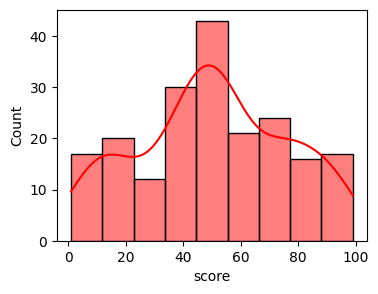

In [22]:
plt.figure(figsize=(4,3))
sns.histplot(x='score', data=df, color='red', kde=True)
plt.show()

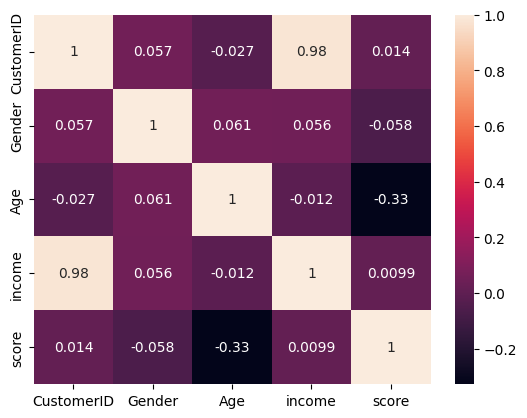

In [25]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [27]:
kmeans = KMeans()
model = kmeans.fit(df[['income', 'score']])

In [28]:
model

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'
